In [1]:
n_sigma_cut = 0.5 # main force for the PID

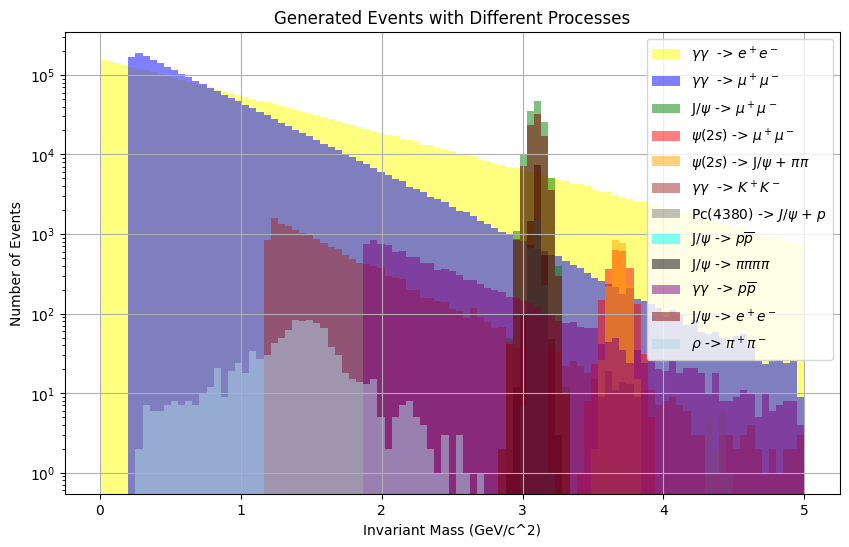

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Event generation parameters
n_photon_photon = 2144429
n_jpsi = 124800
n_psi2S_muons = 2320
n_psi2S_jpsi_pions = 2120
n_pq1 = 14
#n_pq2 = 25
n_pp_kaon = 16920
n_jpsi_protons = 2440
n_jpsi_4pi = 9470
#n_jpsi_3pi = 500
n_photon_photon_proton = 10840 
n_photon_photon_electron = 2971120
n_jpsi_electrons = 84640 #Run 3 & 4
n_rhoprime = 1000

# Constants (GeV/c^2)
m_muon = 0.105658  # Muon mass
m_jpsi = 3.0969    # J/psi mass
m_psi2S = 3.6861   # Psi(2S) mass
m_pion = 0.13957   # Charged pion mass
m_proton= .938 
m_pentaquark= 4.38
m_electron= .0005
m_kaon= 0.49367
m_rho = 0.775
m_rho_prime = 1.465

def isotropic_two_body_decay(mother_mass, daughter_mass1, daughter_mass2):
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    p = tpc_momentum_resolution(p)
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution(momentum):
    a = 0.005
    b = 0.01
    resolution = np.sqrt(a**2 + (b * momentum)**2)
    smeared_momentum = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum

def generate_photon_photon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_muon  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(mass, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, E1, E2 = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#NEW Rho Prime-------------------

def breit_wigner(m0, gamma, size=1):
    return m0 + 0.5 * gamma * np.tan(np.pi * (np.random.rand(size) - 0.5))

def relativistic_breit_wigner(m0, gamma, size=1):
    """
    Sample using relativistic Breit-Wigner:
    P(m) ∝ 1 / [(m^2 - m0^2)^2 + (m0 * gamma)^2]
    """
    m = np.zeros(size)
    for i in range(size):
        accepted = False
        while not accepted:
            # Sample uniformly in a window around the peak
            m_candidate = np.random.uniform(m0 - 3*gamma, m0 + 3*gamma)
            
            bw = 1.0 / ((m_candidate**2 - m0**2)**2 + (m0 * gamma)**2)
            bw_max = 1.0 / ((0)**2 + (m0 * gamma)**2)  # peak
            
            if np.random.rand() < bw / bw_max:
                m[i] = m_candidate
                accepted = True
    return m

def generate_rhoprime_events(n_events, m=1.465, gamma=0.40):
    events = []
    for _ in range(n_events):
        masses_rho_prime = relativistic_breit_wigner(m, gamma, size=1)[0]
        if masses_rho_prime < 2 * m_pion:
            continue
        pion1_p, pion2_p, E1, E2 = isotropic_two_body_decay(masses_rho_prime, m_pion, m_pion)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        events.append([pion1_p, pion2_p])
        # events.append(mass)
    return np.array(events)

def generate_psi2S_muons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(m_psi2S, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_jpsi_pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        jpsi_p, pion_p, jpsi_E, pion_E = isotropic_two_body_decay(m_psi2S, m_jpsi, 2 * m_pion)
        muon1_p, muon2_p, muon1_E, muon2_E = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # jpsi_p = tpc_momentum_resolution(np.linalg.norm(jpsi_p))
        # pion_p = tpc_momentum_resolution(np.linalg.norm(pion_p))
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        smearedTracks.append(pion_p)
        smearedTracks.append(pion_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_protons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_proton, m_proton)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)
#generate_jpsi_protons_events(n_events)

#NEW jpsi->ee
def generate_jpsi_electrons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        electron1_p, electron2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_electron, m_electron)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(electron1_p)
        smearedTracks.append(electron2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_pp_kaon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_kaon + 0.2 # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        pp_kaon1_p, pp_kaon2_p, _, _ = isotropic_two_body_decay(mass, m_kaon, m_kaon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(pp_kaon1_p)
        smearedTracks.append(pp_kaon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> proton + proton

def generate_photon_photon_proton_events(n_events):
    masses = np.random.exponential(0.595, n_events) + 2 * m_proton  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(mass, m_proton, m_proton)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> electrons

def generate_photon_photon_electron_events(n_events):
    masses = np.random.exponential(0.925, n_events) + 2 * m_electron  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        electron1_p, electron2_p, _, _ = isotropic_two_body_decay(mass, m_electron, m_electron)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(electron1_p)
        smearedTracks.append(electron2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def isotropic_three_body_decay(mother_mass, daughter_mass1, daughter_mass2, daughter_mass3):
    """
    Simulates an isotropic three-body decay, distributing energy and momentum according to phase space constraints.
    Returns the momenta and energies of the three daughter particles.
    """
    # Total energy available for distribution after accounting for minimum required energy
    total_energy_available = (mother_mass - daughter_mass1 - daughter_mass2 - daughter_mass3)
    
    if total_energy_available <= 0:
        raise ValueError("Insufficient mass for a three-body decay.")

    # Randomly divide the available energy between the three daughters
    available_energy1 = np.random.uniform(0, total_energy_available)
    available_energy2 = np.random.uniform(0, total_energy_available - available_energy1)
    available_energy3 = total_energy_available - available_energy1 - available_energy2
    
    E1 = daughter_mass1 + available_energy1
    E2 = daughter_mass2 + available_energy2
    E3 = daughter_mass3 + available_energy3

    # Compute the momenta from the energies
    p1 = np.sqrt(E1**2 - daughter_mass1**2)
    p2 = np.sqrt(E2**2 - daughter_mass2**2)
    p3 = np.sqrt(E3**2 - daughter_mass3**2)
    
    # Random angles for isotropic decay
    theta1 = np.arccos(2 * np.random.rand() - 1)
    phi1 = 2 * np.pi * np.random.rand()
    
    theta2 = np.arccos(2 * np.random.rand() - 1)
    phi2 = 2 * np.pi * np.random.rand()
    
    # Calculate the momenta in 3D (isotropic decay)
    p1_vec = np.array([p1 * np.sin(theta1) * np.cos(phi1), p1 * np.sin(theta1) * np.sin(phi1), p1 * np.cos(theta1)])
    p2_vec = np.array([p2 * np.sin(theta2) * np.cos(phi2), p2 * np.sin(theta2) * np.sin(phi2), p2 * np.cos(theta2)])
    p3_vec = -p1_vec - p2_vec  # Momentum conservation
    
    return p1_vec, p2_vec, p3_vec, E1, E2, E3


def boost_to_lab_frame(momentum, boost_vector):
    """
    Boosts the momentum of a particle to the lab frame using the boost vector.
    """
    # Check if the boost vector is effectively zero (no boost needed)
    if np.linalg.norm(boost_vector) < 1e-10:
        print("error1")
        return momentum
    
    beta = boost_vector / np.linalg.norm(boost_vector)
    beta_norm_sq = np.linalg.norm(beta)**2
    
    # Ensure that beta_norm_sq < 1 (speed of light constraint)
    if beta_norm_sq >= 1.0:
        print("error2")
        return momentum  # No valid boost
    
    gamma = 1.0 / np.sqrt(1 - beta_norm_sq)
    dot_product = np.dot(momentum, beta)
    energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
    
    boosted_energy = gamma * (energy + dot_product)
    boosted_momentum = momentum + (gamma - 1) * dot_product / beta_norm_sq * beta + gamma * energy * beta
    
    return boosted_momentum

def boost_along_axis(momentum, beta, axis):
    """
    Boosts a particle along a single axis.
    
    Parameters:
    - momentum: 3D momentum vector of the particle to be boosted
    - beta: velocity (as a fraction of the speed of light) along the chosen axis
    - axis: axis along which to boost ('x', 'y', or 'z')
    
    Returns:
    - boosted_momentum: the 3D momentum vector after the boost along the given axis
    """
    if abs(beta) >= 1:
        print("error2")
        raise ValueError("Beta must be less than 1 for a valid boost.")
    
    gamma = 1.0 / np.sqrt(1 - beta**2)
    
    # Boost along the x-axis
    if axis == 'x':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_px = gamma * (momentum[0] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[0])
        boosted_momentum = np.array([boosted_px, momentum[1], momentum[2]])
    
    # Boost along the y-axis
    elif axis == 'y':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_py = gamma * (momentum[1] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[1])
        boosted_momentum = np.array([momentum[0], boosted_py, momentum[2]])
    
    # Boost along the z-axis
    elif axis == 'z':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_pz = gamma * (momentum[2] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[2])
        boosted_momentum = np.array([momentum[0], momentum[1], boosted_pz])
    
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return boosted_momentum, boosted_energy

def boost_to_lab_frame_separate(momentum, boost_vector):
    """
    Boosts the particle's 3D momentum vector using separate boosts along the x, y, and z axes.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - boost_vector: 3D velocity vector (as a fraction of the speed of light)
    
    Returns:
    - boosted_momentum: the 3D momentum vector after boosting along x, y, and z
    """
    boosted_momentum = momentum
    # Boost along x
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[0], 'x')
    # Boost along y
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[1], 'y')
    # Boost along z
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[2], 'z')
    
    px, py, pz = boosted_momentum
    p_total = np.sqrt(px**2 + py**2 + pz**2)
    
    # Calculate new theta (polar angle)
    theta_prime = np.arccos(pz / p_total) if p_total > 0 else 0.0
    
    # Calculate new phi (azimuthal angle)
    phi_prime = np.arctan2(py, px)

    return boosted_momentum, theta_prime, phi_prime


def generate_psi2S_jpsi_pions_events_fixed(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        
        # Boost the muons back to the lab frame using the momentum of the J/psi from Step 1
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        smearedTracks.append(muon1_p_lab)
        smearedTracks.append(muon2_p_lab)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

def isotropic_two_body_decay_no_smearing(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay without smearing.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution_3d(momentum_vec):
    """
    Applies TPC momentum resolution smearing to each component of the momentum vector.
    """
    smeared_momentum_vec = np.zeros(3)
    for i in range(3):
        momentum = momentum_vec[i]
        a = 0.005
        b = 0.01
        resolution = np.sqrt(a**2 + (b * momentum)**2)
        smeared_momentum_vec[i] = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum_vec

def generate_psi2S_jpsi_pions_events_smearing_after_boost(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (without smearing)
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay_no_smearing(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        # Step 4: Apply smearing to the muons after boosting to the lab frame (component-wise)
        muon1_p_lab_smeared = tpc_momentum_resolution_3d(muon1_p_lab)
        muon2_p_lab_smeared = tpc_momentum_resolution_3d(muon2_p_lab)
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

# def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq):
#     plt.figure(figsize=(10, 6))
#     bins = np.linspace(0, 5, 100)
#     plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
#     plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
#     plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2S) -> 2 muons', color='red')
#     plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2S) -> J/psi + 2 pions', color='orange')
#     plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='cyan')
#     plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
#     plt.hist(events_pq, bins, alpha=0.5, label='pentaquark(2S) -> J/psi + 1 proton', color='gray')
#     plt.xlabel('Invariant Mass (GeV/c^2)')
#     plt.yscale('log')  # Log scale for y-axis
#     plt.ylabel('Number of Events')
#     plt.title('Generated Events with Different Processes')
#     plt.legend(loc='upper right')
#     plt.grid(True)
#     plt.show()

def plot_event_distribution(events_photon_photon_electron, events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq, events_jpsi_4pions, events_photon_photon_proton, events_jpsi_electrons, events_rhoprime):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon_electron, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $e^+ e^-$', color='yellow')
    plt.hist(events_photon_photon, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label=r'J/$\psi$ -> $\mu^+ \mu^-$', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label=r'$\psi(2s)$ -> $\mu^+ \mu^-$', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label=r'$\psi(2s)$ -> J/$\psi$ + $\pi \pi$', color='orange')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $K^+ K^-$', color='brown')
    plt.hist(events_pq, bins, alpha=0.5, label=r'Pc(4380) -> $J/ \psi$ + $p$', color='gray')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label=r'J/$\psi$ -> $p \overline{p}$', color='cyan')
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label=r'J/$\psi$ -> $\pi \pi \pi \pi$', color='black')
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $p \overline{p}$', color='purple')
    plt.hist(events_jpsi_electrons, bins, alpha=0.5, label=r'J/$\psi$ -> $e^+ e^-$', color='maroon')
    plt.hist(events_rhoprime, bins, alpha=0.5, label=r'$\rho$ -> $\pi^+ \pi^-$', color='lightblue')

    #plt.hist(events_jpsi_rho, bins, alpha=0.5, label='J/psi -> 2 rho', color='purple')
    #plt.hist(events_jpsi_3pions, bins, alpha=0.5, label='J/psi -> 3 pions', color='pink')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right', fontsize = 10)
    plt.grid(True)
    plt.show()


#plt.rcParams.update({'font.size': 15})

def plot_event_distribution1(events_jpsi_4pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label='J/psi -> 4 pions', color='black')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


def compute_invariant_mass(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_muon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_kaon(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_kaon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_proton(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_proton  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_electron(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_electron  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pion(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_pion  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_jpsi_proton(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_proton(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_kaon(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_kaon(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pion(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pion(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_electron(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_electron(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events(events):
    """
    Computes the invariant mass for a list of events, where each event contains a list of tracks.
    
    Parameters:
    - events: A list of events, where each event is a list of tracks.
              Each track is a dictionary containing:
              - 'momentum': a numpy array representing the 3-momentum of the track
              - 'mass': the mass of the particle
    
    Returns:
    - invariant_masses: A list of invariant masses, one for each event.
    """
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def isotropic_two_body_decay_with_angles(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay with angle saving (theta, phi).
    Returns momenta, energies, and angles.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    
    return p1, p2, E1, E2, theta, phi

def reconstruct_3d_momentum(smeared_p, theta, phi):
    """
    Reconstructs the 3D momentum components using the smeared momentum magnitude and saved angles (theta, phi).
    """
    px = smeared_p * np.sin(theta) * np.cos(phi)
    py = smeared_p * np.sin(theta) * np.sin(phi)
    pz = smeared_p * np.cos(theta)
    
    return np.array([px, py, pz])

def calculate_boost_vector(momentum, energy):
    """
    Calculates the velocity (beta) from the momentum and energy to be used as the boost vector.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - energy: total energy of the particle
    
    Returns:
    - beta: 3D velocity vector (beta = p / E)
    """
    beta = momentum / energy
    return beta

def generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        
        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(pion1_E)
        smearedTracks.append(pion2_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
    # return np.array(events)


def generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(proton_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(proton_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
#generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# def generate_jpsi_four_pions(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

#         pion3_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
#         pion4_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion4_p_rest, boost_vector)
        
#         # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))
#         smeared_pion4_p = tpc_momentum_resolution(np.linalg.norm(pion4_p_lab))

        
#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_pion3_p, theta_prime, phi_prime) #<- correct
#         smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_pion4_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(smeared_pion3_p_lab)
#         smearedTracks.append(smeared_pion4_p_lab)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(pion2_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)
#         smearedTracks.append(pion2_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)
    
#     return events

def lorentz_boost(p_vec, mass, beta):
    """
    Boosts a particle's 4-vector from its rest frame to the lab frame using a Lorentz transformation.
    
    Parameters:
      p_vec: 3D numpy array of the particle's momentum in the rest frame.
      mass: Mass of the particle.
      beta: 3D numpy array representing the boost velocity vector (v/c). Its norm must be less than 1.
    
    Returns:
      E_prime: Boosted energy.
      p_prime: Boosted 3-momentum (numpy array).
    """
    beta2 = np.dot(beta, beta)
    if beta2 >= 1:
        raise ValueError("Beta must be less than 1.")
    gamma = 1.0 / np.sqrt(1 - beta2)
    # Energy in the particle's rest frame (before boost)
    E = np.sqrt(np.linalg.norm(p_vec)**2 + mass**2)
    p_dot_beta = np.dot(p_vec, beta)
    # Lorentz transformation for the time component
    E_prime = gamma * (E + p_dot_beta)
    # Lorentz transformation for the spatial part
    p_prime = p_vec + ((gamma - 1) * p_dot_beta / beta2 + gamma * E) * beta
    return E_prime, p_prime

def generate_jpsi_four_pions(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
                              E3_smeared, E4_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events

def generate_psi2S_jpsi_pions_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, pion1_p, pion2_p,
                              E1_smeared, E2_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_pentaquark_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, proton_p,
                              E1_smeared, E2_smeared, proton_E])
        events.append(smearedTracks)
    
    return events


# def generate_jpsi_3pions_events(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         rho_p, pion1_p, rho_E, pion1_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion2_p_rest, pion3_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(rho_p, rho_E)

#         pion2_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion2_p_rest, boost_vector)
#         pion3_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
        
#         smeared_pion2_p = tpc_momentum_resolution(np.linalg.norm(pion2_p_lab))
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))

#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         pion2_p_lab_smeared = reconstruct_3d_momentum(smeared_pion2_p, theta_prime, phi_prime) #<- correct
#         pion3_p_lab_smeared = reconstruct_3d_momentum(smeared_pion3_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(pion2_p_lab_smeared)
#         smearedTracks.append(pion3_p_lab_smeared)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion2_p)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)

#     return events

def generate_jpsi_3pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ -> ρ + π (two-body decay)
        # The first daughter is the ρ, the second is the "direct" pion.
        rho_p, pion_direct_p, rho_E, pion_direct_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
        # Step 2: ρ -> π + π in the ρ rest frame (with angles saved)
        pion1_p_rest, pion2_p_rest, _, _, theta, phi = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost for the ρ decay products using the ρ's four-momentum.
        # (Beta = p/E for the ρ.)
        beta = rho_p / rho_E
        
        # Use our dedicated Lorentz boost function to boost each pion from the ρ rest frame to the lab frame.
        E1_lab, pion1_p_lab = lorentz_boost(pion1_p_rest, m_pion, beta)
        E2_lab, pion2_p_lab = lorentz_boost(pion2_p_rest, m_pion, beta)
        
        # Step 4: (Optional) Apply momentum smearing to the boosted momenta.
        p1_lab_mag = np.linalg.norm(pion1_p_lab)
        p2_lab_mag = np.linalg.norm(pion2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)
        
        # Extract the original directions from the boosted momenta.
        theta1 = np.arccos(pion1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(pion1_p_lab[1], pion1_p_lab[0])
        theta2 = np.arccos(pion2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(pion2_p_lab[1], pion2_p_lab[0])
        
        # Reconstruct the smeared momentum vectors.
        smeared_pion1_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_pion2_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)
        
        # Recalculate the energies for these pions.
        E1_smeared = np.sqrt(np.linalg.norm(smeared_pion1_lab)**2 + m_pion**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_pion2_lab)**2 + m_pion**2)
        
        # Step 5: Process the direct pion.
        # Optionally, you can smear its momentum as well.
        p_direct = np.linalg.norm(pion_direct_p)
        smeared_direct = tpc_momentum_resolution(p_direct)
        theta_direct = np.arccos(pion_direct_p[2] / p_direct) if p_direct > 0 else 0.0
        phi_direct = np.arctan2(pion_direct_p[1], pion_direct_p[0])
        smeared_pion_direct = reconstruct_3d_momentum(smeared_direct, theta_direct, phi_direct)
        E_direct_smeared = np.sqrt(np.linalg.norm(smeared_pion_direct)**2 + m_pion**2)
        
        # Final event: three pions with their four-vector information.
        # Here we store a tuple: ([p1, p2, p_direct], [E1, E2, E_direct])
        # event["momenta"] = [smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct]
        # event["energies"] = [E1_smeared, E2_smeared, E_direct_smeared]
        smearedTracks.extend([smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct, E1_smeared, E2_smeared, E_direct_smeared])
        events.append(smearedTracks)

        # events.append(event)
    
    return events

# def compute_invariant_mass_jpsi_3pi(event):
#     # event contains:
#     #   event["momenta"]: list of 3 numpy arrays for 3-momenta
#     #   event["energies"]: list of corresponding energies.
#     total_E = sum(event["energies"])
#     total_p = event["momenta"][0] + event["momenta"][1] + event["momenta"][2]
#     inv_mass_sq = total_E**2 - np.linalg.norm(total_p)**2
#     if inv_mass_sq > 0:
#         return np.sqrt(inv_mass_sq)
#     else:
#         print("errorInv in 3pi")
#         return np.nan


def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E  = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pq_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, proton_p, m1_E, m2_E, p_E,  = all
    total_energy = m1_E + m2_E + p_E 
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + proton_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_4pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E  = all
    total_energy = p1_E + p2_E + p3_E + p4_E 
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p + pion4_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_3pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E  = all
    total_energy = p1_E + p2_E + p3_E  
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p  
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass


def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pq(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pq_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_3pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_3pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_4pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_4pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses


# Steering function for generating events
def generate_all_events():
    events_photon_photon_electron = generate_photon_photon_electron_events(n_photon_photon_electron)
    events_photon_photon = generate_photon_photon_events(n_photon_photon)
    events_jpsi = generate_jpsi_events(n_jpsi)
    events_psi2S_muons = generate_psi2S_muons_events(n_psi2S_muons)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(n_psi2S_jpsi_pions)
    events_pp_kaons = generate_pp_kaon_events(n_pp_kaon)
    events_jpsi_protons = generate_jpsi_protons_events(n_jpsi_protons)
    events_pq = generate_pentaquark_events_new(n_pq1)
    events_jpsi_4pions = generate_jpsi_four_pions(n_jpsi_4pi)
    events_photon_photon_proton = generate_photon_photon_proton_events(n_photon_photon_proton)
    events_jpsi_electrons = generate_jpsi_electrons_events(n_jpsi_electrons)
    events_rhoprime = generate_rhoprime_events(n_rhoprime)

    # events_jpsi_rho = generate_jpsi_rho_events(n_jpsi_4pi)
    #events_jpsi_3pions = generate_jpsi_3pions_events(n_jpsi_3pi)

    photon_photon_electron = compute_invariant_masses_for_events_electron(events_photon_photon_electron)
    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)
    pp_kaons      = compute_invariant_masses_for_events_kaon(events_pp_kaons)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    pentaquark    = compute_invariant_masses_for_events_pq(events_pq)
    jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)
    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    jpsi_electrons  = compute_invariant_masses_for_events_electron(events_jpsi_electrons)
    rho_prime  = compute_invariant_masses_for_events_pion(events_rhoprime)


    #jpsi_rho      = compute_invariant_masses_for_events_jpsi_rho(events_jpsi_rho)
    #jpsi_3pi      = compute_invariant_masses_for_events_jpsi_3pi(events_jpsi_3pions)


    plot_event_distribution(photon_photon_electron, photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi, jpsi_protons, pp_kaons, pentaquark, jpsi_4pi, photon_photon_proton, jpsi_electrons, rho_prime)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events()



) missing from font(s) DejaVu Sans.k/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


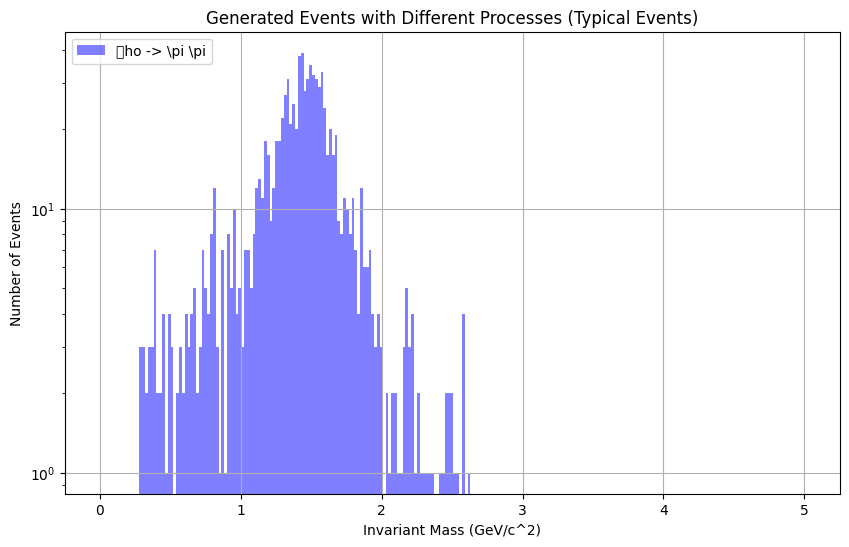

In [11]:
def plot_event_distribution_rho(events_rho_prime):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 250)
    plt.hist(events_rho_prime, bins=bins, alpha=0.5, label='\rho -> \pi \pi', color='blue')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    #plt.xlim(1.1,1.35)
    plt.ylabel('Number of Events')
    #plt.ylim(4,18)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_rho():
    events_rho_prime = generate_rhoprime_events(1000)
    
    rho_prime = compute_invariant_masses_for_events_pion(events_rho_prime)
    
    plot_event_distribution_rho(rho_prime)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_rho()

[219.94520139564548, 218.113327068637, 195.58703568986405, 163.82054246244653, 226.1732300588587, 208.72693878322227, 246.76713012919717, 216.64041881687234, 194.31958418423866, 237.90915686348865, 243.27079663574094, 260.3398914211549, 213.62893541129685, 215.29853403191476, 193.87536116693732, 232.7687660747363, 240.43580086497843, 199.5251618478782, 199.05765219721596, 262.2711910970097, 206.01772570817872, 197.45861312630433, 222.84980539395886, 214.00369099587476, 233.51068317086697, 219.66537120978487, 265.5010162481051, 232.33756887390595, 256.2720764235009, 228.21423056579164, 249.81315277133925, 196.82318821657546, 194.67277623951549, 213.1473668074438, 235.71555212217197, 221.29468258157138, 221.51298605914528, 200.06961180340997, 213.38767338184996, 244.98233263626767, 255.98356049462822, 193.3580226785699, 222.52376406514128, 233.8934788839154, 245.95923550427236, 259.3171103177202, 229.78991599132794, 227.14605859722576, 220.95884747837772, 230.95635701340777, 233.59707166

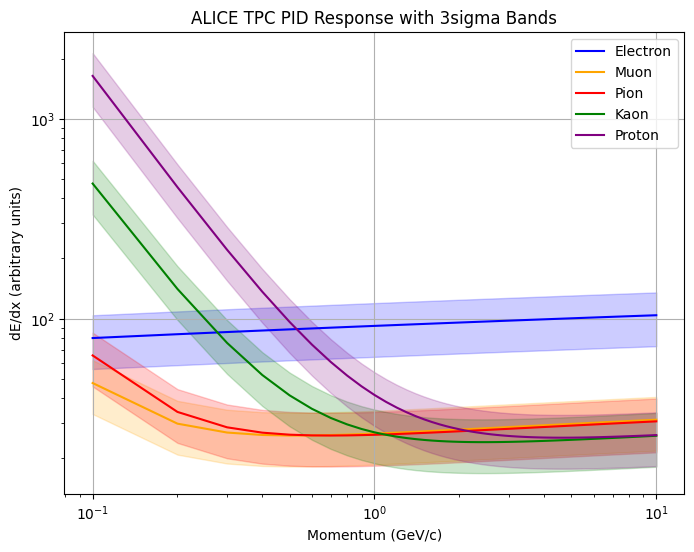

In [3]:
#PID PLOT WITH BANDS
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)) * 17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    mass_dict = {
        'electron': 0.000511,
        'muon': 0.10566,
        'pion': 0.13957,
        'kaon': 0.49367,
        'proton': 0.93827
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

def error_extremes(momentum, particle_type, stretch_factor):
    _, lower_band, upper_band = tpc_pid_response(momentum, particle_type, stretch_factor)
    return upper_band, lower_band

def random_gaussian(mean, sigma):

    return np.random.normal(mean, sigma)

def gaussian_tpc_response(momentum, particle_type, stretch_factor):

    # Get the mean dE/dx from TPC PID response
    mean_dEdx, _, _ = tpc_pid_response(momentum, particle_type,stretch_factor)
    
    # Calculate the extremes for the 3σ band
    upper_band, lower_band = error_extremes(momentum, particle_type, stretch_factor)
    
    # Estimate σ as 1/3rd of the difference between the upper and lower bands
    sigma_dEdx = (upper_band - lower_band) / 6
    
    # Generate a random dE/dx value from a Gaussian distribution
    random_dEdx = random_gaussian(mean_dEdx, sigma_dEdx)
    
    return random_dEdx

 # Example usage
momentum = .3  # Example momentum in GeV/c
particle_type = 'proton'  # Example particle type
x=1000 #Amount of random numbers

rn=[]
for _ in range(x):

    if (particle_type == 'electron'):
        stretch_factor=1
    elif (particle_type == 'muon'):
        stretch_factor=.41
    elif (particle_type == 'pion'):
        stretch_factor=.41
    elif (particle_type == 'kaon'):
        stretch_factor=.38
    elif (particle_type == 'proton'):
        stretch_factor=.40

    random_value = gaussian_tpc_response(momentum, particle_type, stretch_factor)
    rn.append(random_value)
print(rn)

xvalues=[]
for _ in range(x):
    xvalues.append(momentum)
print(xvalues)

def plot_tpc_pid_response(momentum_range):
    """
    Plot the TPC PID response and error bands for various particle types.
    """
    # Calculate responses and PID bands for different particle species
    particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    plt.figure(figsize=(8, 6))
    
    for particle, settings in particle_types.items():
        response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
        plt.plot(momentum_range, response, label=particle, color=settings['color'])
        plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.2)
    
   # plt.plot(xvalues,rn, color= 'black')
    
    plt.xlabel('Momentum (GeV/c)')
    plt.ylabel('dE/dx (arbitrary units)')
    plt.xscale('log')  # Log scale for x-axis
    plt.yscale('log')  # Log scale for y-axis
    plt.title('ALICE TPC PID Response with 3sigma Bands')
    plt.legend()
    plt.grid(True)
    #plt.savefig("PID_empty.pdf")
    plt.show()
    
# Generate a momentum range and plot
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c
plot_tpc_pid_response(momentum_range)


# First Generation Dataframes

In [4]:
import pandas as pd

data_for_pp_muons_gen1 = []
pp_muons_events = generate_photon_photon_events(n_photon_photon)
for event_id, event in enumerate(pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_pp_muons_gen1 = pd.DataFrame(data_for_pp_muons_gen1)

data_for_jpsimuons_gen1= []
jpsi_muons_events = generate_jpsi_events(n_jpsi)
for event_id, event in enumerate(jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_jpsimuons_gen1 = pd.DataFrame(data_for_jpsimuons_gen1)

data_for_jpsiprotons_gen1= []
jpsi_protons_events = generate_jpsi_protons_events(n_jpsi_protons)
for event_id, event in enumerate(jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_jpsiprotons_gen1 = pd.DataFrame(data_for_jpsiprotons_gen1)

data_for_jpsielectrons_gen1= []
jpsi_electrons_events = generate_jpsi_electrons_events(n_jpsi_electrons)
for event_id, event in enumerate(jpsi_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
df_jpsielectrons_gen1 = pd.DataFrame(data_for_jpsielectrons_gen1)

data_for_psi2smuons_gen1 = []
psi2s_muons_events = generate_psi2S_muons_events(n_psi2S_muons)
for event_id, event in enumerate(psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_psi2smuons_gen1 = pd.DataFrame(data_for_psi2smuons_gen1)

data_for_pp_kaons_gen1 = []
pp_kaons_events = generate_pp_kaon_events(n_pp_kaon)
for event_id, event in enumerate(pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
df_pp_kaons_gen1 = pd.DataFrame(data_for_pp_kaons_gen1)

data_for_pp_protons_gen1 = []
pp_protons_events = generate_photon_photon_proton_events(n_photon_photon_proton)
for event_id, event in enumerate(pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_pp_protons_gen1 = pd.DataFrame(data_for_pp_protons_gen1)

data_for_pp_electrons_gen1 = []
pp_electrons_events = generate_photon_photon_electron_events(n_photon_photon_electron)
for event_id, event in enumerate(pp_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
df_pp_electrons_gen1 = pd.DataFrame(data_for_pp_electrons_gen1)

data_for_psi2s_muons_pions_gen1 = []
psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_psi2S_jpsi_pions)
for event_id, event in enumerate(psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
df_psi2s_muons_pions_gen1 = pd.DataFrame(data_for_psi2s_muons_pions_gen1)
df_psi2s_muons_pions_gen1.head()

data_for_pentaquark_gen1 = []
pentaquark_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pq1)
for event_id, event in enumerate(pentaquark_events):
    muon1_p, muon2_p, proton_p, _, _, _ = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    proton_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton_p[0], "py": proton_p[1], "pz": proton_p[2], "Energy": proton_E})
df_pentaquark_gen1 = pd.DataFrame(data_for_pentaquark_gen1)

data_for_jpsi_four_pions_gen1 = []
jpsi_four_pions_events = generate_jpsi_four_pions(n_jpsi_4pi)
for event_id, event in enumerate(jpsi_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_jpsi_four_pions_gen1 = pd.DataFrame(data_for_jpsi_four_pions_gen1)


In [5]:
n_training = 30000

training_data_for_pp_muons_gen1 = []
training_pp_muons_events = generate_photon_photon_events(n_training)
for event_id, event in enumerate(training_pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_pp_muons_gen1 = pd.DataFrame(training_data_for_pp_muons_gen1)

training_data_for_jpsimuons_gen1= []
training_jpsi_muons_events = generate_jpsi_events(n_training)
for event_id, event in enumerate(training_jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_jpsimuons_gen1 = pd.DataFrame(training_data_for_jpsimuons_gen1)

training_data_for_jpsielectrons_gen1= []
training_jpsi_electrons_events = generate_jpsi_electrons_events(n_training)
for event_id, event in enumerate(training_jpsi_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    training_data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    training_data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
training_df_jpsielectrons_gen1 = pd.DataFrame(training_data_for_jpsielectrons_gen1)

training_data_for_jpsiprotons_gen1= []
training_jpsi_protons_events = generate_jpsi_protons_events(n_training)
for event_id, event in enumerate(training_jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_jpsiprotons_gen1 = pd.DataFrame(training_data_for_jpsiprotons_gen1)

training_data_for_psi2smuons_gen1 = []
training_psi2s_muons_events = generate_psi2S_muons_events(n_training)
for event_id, event in enumerate(training_psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_psi2smuons_gen1 = pd.DataFrame(training_data_for_psi2smuons_gen1)

training_data_for_pp_kaons_gen1 = []
training_pp_kaons_events = generate_pp_kaon_events(n_training)
for event_id, event in enumerate(training_pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
training_df_pp_kaons_gen1 = pd.DataFrame(training_data_for_pp_kaons_gen1)

training_data_for_pp_protons_gen1 = []
training_pp_protons_events = generate_photon_photon_proton_events(n_training)
for event_id, event in enumerate(training_pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_pp_protons_gen1 = pd.DataFrame(training_data_for_pp_protons_gen1)

training_data_for_pp_electrons_gen1 = []
training_pp_electrons_events = generate_photon_photon_electron_events(n_training)
for event_id, event in enumerate(training_pp_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    training_data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    training_data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
training_df_pp_electrons_gen1 = pd.DataFrame(training_data_for_pp_electrons_gen1)

training_data_for_psi2s_muons_pions_gen1 = []
training_psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_training)
for event_id, event in enumerate(training_psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
training_df_psi2s_muons_pions_gen1 = pd.DataFrame(training_data_for_psi2s_muons_pions_gen1)
training_df_psi2s_muons_pions_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,muon,1.097691,-0.591706,-0.008567,1.251511
1,0,muon,-1.582181,0.995339,0.444693,1.924295
2,0,pion,-0.013808,0.140862,0.020600,0.199842
3,0,pion,0.558926,-0.579202,-0.467285,0.280075
4,1,muon,-1.440025,0.533455,1.232207,1.971736


# Kinematics Dataframes

In [6]:
def kinematics_pt_eta_phi(px, py, pz):
    pt = np.sqrt(px**2 + py**2)
    p  = np.sqrt(px**2 + py**2 + pz**2)

    # Avoid divisions that cause infinities
    if p != abs(pz):
        eta = 0.5 * np.log((p + pz) / (p - pz))
    else:
        eta = np.nan

    phi = np.arctan2(py, px)

    return pt, eta, phi

In [ ]:
df_kinematics_ppmu = df_pp_muons_gen1.copy()

df_kinematics_ppmu["pt"], df_kinematics_ppmu["eta"], df_kinematics_ppmu["phi"] = zip(*df_kinematics_ppmu.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_ppmu.groupby("EventID").size()
df_kinematics_ppmu["Ntracks"] = df_kinematics_ppmu["EventID"].map(track_counts)

df_kinematics_ppmu = df_kinematics_ppmu.drop(columns=["px", "py", "pz", "Energy"])
df_kinematics_ppmu

In [ ]:
training_df_kinematics_ppmu = training_df_pp_muons_gen1.copy()

training_df_kinematics_ppmu["pt"], training_df_kinematics_ppmu["eta"], training_df_kinematics_ppmu["phi"] = zip(*training_df_kinematics_ppmu.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_ppmu.groupby("EventID").size()
training_df_kinematics_ppmu["Ntracks"] = training_df_kinematics_ppmu["EventID"].map(track_counts)

training_df_kinematics_ppmu = training_df_kinematics_ppmu.drop(columns=["px", "py", "pz", "Energy"])
training_df_kinematics_ppmu

In [ ]:
df_kinematics_ppel = df_pp_electrons_gen1.copy()

df_kinematics_ppel["pt"], df_kinematics_ppel["eta"], df_kinematics_ppel["phi"] = zip(*df_kinematics_ppel.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_ppel.groupby("EventID").size()
df_kinematics_ppel["Ntracks"] = df_kinematics_ppel["EventID"].map(track_counts)

df_kinematics_ppel = df_kinematics_ppel.drop(columns=["px", "py", "pz", "Energy"])
df_kinematics_ppel

In [ ]:
training_df_kinematics_ppel = training_df_pp_electrons_gen1.copy()

training_df_kinematics_ppel["pt"], training_df_kinematics_ppel["eta"], training_df_kinematics_ppel["phi"] = zip(*training_df_kinematics_ppel.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_ppel.groupby("EventID").size()
training_df_kinematics_ppel["Ntracks"] = training_df_kinematics_ppel["EventID"].map(track_counts)

training_df_kinematics_ppel = training_df_kinematics_ppel.drop(columns=["px", "py", "pz", "Energy"])
training_df_kinematics_ppel

In [ ]:
df_kinematics_ppka = df_pp_kaons_gen1.copy()

df_kinematics_ppka["pt"], df_kinematics_ppka["eta"], df_kinematics_ppka["phi"] = zip(*df_kinematics_ppka.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_ppka.groupby("EventID").size()
df_kinematics_ppka["Ntracks"] = df_kinematics_ppka["EventID"].map(track_counts)

df_kinematics_ppka = df_kinematics_ppka.drop(columns=["px", "py", "pz", "Energy"])
df_kinematics_ppka

In [ ]:
training_df_kinematics_ppka = training_df_pp_kaons_gen1.copy()

training_df_kinematics_ppka["pt"], training_df_kinematics_ppka["eta"], training_df_kinematics_ppka["phi"] = zip(*training_df_kinematics_ppka.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_ppka.groupby("EventID").size()
training_df_kinematics_ppka["Ntracks"] = training_df_kinematics_ppka["EventID"].map(track_counts)

training_df_kinematics_ppka = training_df_kinematics_ppka.drop(columns=["px", "py", "pz", "Energy"])
training_df_kinematics_ppka

In [7]:
df_kinematics_jpsi = df_jpsimuons_gen1.copy()

df_kinematics_jpsi["pt"], df_kinematics_jpsi["eta"], df_kinematics_jpsi["phi"] = zip(*df_kinematics_jpsi.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_jpsi.groupby("EventID").size()
df_kinematics_jpsi["Ntracks"] = df_kinematics_jpsi["EventID"].map(track_counts)

df_kinematics_jpsi = df_kinematics_jpsi.drop(columns=["px", "py", "pz", "Energy"])
df_kinematics_jpsi

,EventID,Particle,pt,eta,phi,Ntracks
0,0,muon,1.122263,-0.854244,0.252968,2
1,0,muon,1.122263,0.854244,-2.888625,2
2,1,muon,1.316336,0.623972,-0.829054,2
3,1,muon,1.316336,-0.623972,2.312538,2
4,2,muon,1.528704,-0.149570,-2.418364,2
...,...,...,...,...,...,...
249595,124797,muon,0.886615,-1.184537,-0.707084,2
249596,124798,muon,1.268349,-0.620599,1.854386,2
249597,124798,muon,1.268349,0.620599,-1.287207,2
249598,124799,muon,1.528672,-0.178179,-2.717677,2


In [8]:
training_df_kinematics_jpsi = training_df_jpsimuons_gen1.copy()

training_df_kinematics_jpsi["pt"], training_df_kinematics_jpsi["eta"], training_df_kinematics_jpsi["phi"] = zip(*training_df_kinematics_jpsi.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_jpsi.groupby("EventID").size()
training_df_kinematics_jpsi["Ntracks"] = training_df_kinematics_jpsi["EventID"].map(track_counts)

training_df_kinematics_jpsi = training_df_kinematics_jpsi.drop(columns=["px", "py", "pz", "Energy"])
training_df_kinematics_jpsi

,EventID,Particle,pt,eta,phi,Ntracks
0,0,muon,1.327166,-0.507353,-1.076123,2
1,0,muon,1.327166,0.507353,2.065469,2
2,1,muon,0.826923,-1.223714,-2.790894,2
3,1,muon,0.826923,1.223714,0.350699,2
4,2,muon,1.515658,0.238468,-1.045044,2
...,...,...,...,...,...,...
59995,29997,muon,1.545400,-0.056041,2.996673,2
59996,29998,muon,1.545431,-0.046364,1.800633,2
59997,29998,muon,1.545431,0.046364,-1.340960,2
59998,29999,muon,1.585593,-0.048120,-2.743932,2
